In [84]:
import mercury as mr

In [92]:
# add select widget
app = mr.App(title="Dash Days Demo", description="")
my_selection = mr.Select(value="click", choices=["click", "mouseover"], label="")
 
# access selected values
# print(f"Selected values are {my_selection.value}")

mercury.App

mercury.Select

In [78]:
from elasticsearch import Elasticsearch


host = 'localhost'
port = 9200  # Default Elasticsearch port is 9200

# Create an Elasticsearch instance with host and port
es = Elasticsearch([{'host': host, 'port': port, 'scheme': 'http'}])


# Specify the index and field you want to query
index_name = "userale"
field_name = "pageTitle"

# Define the query using the match query as an example
# query = {
#     "size": 1000,
#     "query": {
#         "match": {
#             "pageTitle": "LF Transcribe",
#             "type": "click"
#         }
#     }
# }

query = {
    "size": 1000,
    "query": {
        "bool": {
            "must": [
                {"match": {"pageTitle": "LF Transcribe"}},
                {"match": {"type": my_selection.value}}
            ]
        }
    }
}

# Execute the search
result = es.search(index=index_name, body=query)

# Process the results
# print("Number of data points", len(result['hits']['hits']))
# print("Example:\n", result['hits']['hits'][0])

Number of data points 59
Example:
 {'_index': 'userale', '_id': 'bUJZR40BwP5AsmvSFXLu', '_score': 2.0031803, '_source': {'host': {'ip': '192.168.65.1'}, 'details': {'ctrl': False, 'meta': False, 'alt': False, 'shift': False, 'clicks': 1}, 'target': 'main.flex justify-center pt-20', 'toolName': None, 'browser': {'browser': 'chrome', 'version': '121.0.0'}, 'major_ver': '2', '@timestamp': '2024-01-26T19:57:17.035592918Z', 'sessionID': 'this one', 'type': 'click', 'pageReferrer': '', 'user_agent': {'original': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36'}, 'location': {'x': 185, 'y': 349}, 'pageTitle': 'LF Transcribe', 'logType': 'raw', 'useraleVersion': '2.3.0', 'userAction': True, 'pageUrl': 'http://localhost:5173/', 'http': {'method': 'POST', 'request': {'mime_type': 'application/json;charset=UTF-8', 'body': {'bytes': '32811'}}, 'version': 'HTTP/1.1'}, 'url': {'path': '/loki/api/v1/push', 'domain': 'localhost', '

In [81]:
data_xy = []
for dp in result['hits']['hits']:
    if 'location' in dp['_source']:
        data_xy.append((dp['_source']['location']['x'], dp['_source']['location']['y']))

In [82]:
import matplotlib.pyplot as plt
from PIL import Image

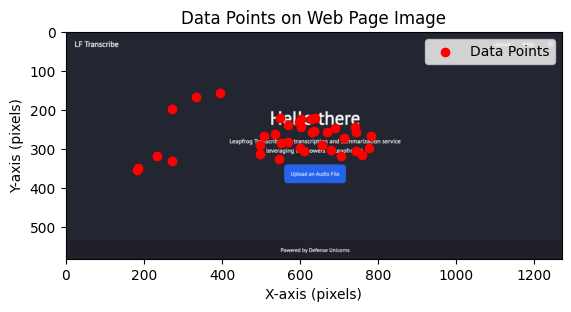

In [83]:
image_path = 'doug-translate.png'  # Replace with your actual image path
web_page_image = Image.open(image_path)

# Pixel positions of data points
pixel_positions = data_xy

# Convert pixel positions to numpy arrays for plotting
pixel_positions = [(int(x), int(y)) for x, y in pixel_positions]
pixel_positions = list(zip(*pixel_positions))

# Plot data points on the image
plt.imshow(web_page_image)
plt.scatter(pixel_positions[0], pixel_positions[1], color='red', marker='o', label='Data Points')

# Add labels, legend, etc. based on your requirements
plt.title('Data Points on Web Page Image')
plt.xlabel('X-axis (pixels)')
plt.ylabel('Y-axis (pixels)')
plt.legend()

# Show the plot
plt.show()